# Лабораторная работа 4

### __Автор:__ Стецук Максим ИВТ 3 курс

В данной лабораторной работе мной была проведена обработка данных с помощью специальных библиотек, реализованная в Jupyter Notebook.

### Выполненные задачи

1. Реализованы модели для степеней полинома 1, 2, 3, 5, 10, 20, а также визуализированы на одной координатной плоскости;
2. Найдены метрики MSE, RMSE, MAE для каждой модели с использованием специальной библиотеки:
    - Степень полинома 1: mse = 431822.81270718103, rmse = 657.1322642415156, mae = 504.88101037565264;
    - Степень полинома 2: mse = 244875.52092269278, rmse = 494.84898799804853, mae = 389.2663189980563;
    - Степень полинома 3: mse = 189592.0326962248, rmse = 435.4216722858714, mae = 344.1036970490545;
    - Степень полинома 5: mse = 169339.74770906614, rmse = 411.5091101167338, mae = 325.13909896864163;
    - Степень полинома 10: mse = 165907.92702536422, rmse = 407.3179679628241, mae = 319.0408273417002;
    - Степень полинома 20: mse = 150377.87109127195, rmse = 387.78585726051426, mae = 300.73478823407595;
3. Построен график зависимости MSE от степени полинома, исходя из которого можно сделать вывод, что чем выше степень полинома рассматриваемой модели, тем значение среднеквадратической ошибки ниже;
4. Реализован замер времени вычисления MSE для степени полинома 20 при вычислении с помощью библиотечной функции и самостоятельно реализованной функции:  
MSE by my func: 150377.8710912718  
Time taken for my function: 0.0017788410186767578 seconds  
MSE by lib func: 150377.87109127195  
Time taken for lib function: 0.000782012939453125 seconds  
Из полученных результатов видно, что точность вычисления у библиотечной и самостоятельно реализованной функций очень близка, однако время вычисления у библиотечной функции значительно ниже, чем у самостоятельно реализованной.

In [57]:
import pandas as pd

data = pd.read_csv('web_traffic.tsv',delimiter='\t', names=['hour','n_requests'])
print(type(data))

input_var = 'hour'
target_var = 'n_requests'

hours_data = data[input_var]
requests_data = data[target_var]

filtered_data = data.dropna()
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
Index: 735 entries, 0 to 742
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hour        735 non-null    int64  
 1   n_requests  735 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 17.2 KB


In [58]:
req_data = pd.notna(requests_data)

print(hours_data[req_data])

0        1
2        3
3        4
4        5
5        6
      ... 
738    739
739    740
740    741
741    742
742    743
Name: hour, Length: 735, dtype: int64


In [59]:
import numpy as np

hours_data = hours_data[pd.notna(requests_data)]
requests_data = requests_data[pd.notna(requests_data)]

print(hours_data[:25], requests_data[:25])

0      1
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
20    21
21    22
23    24
24    25
25    26
26    27
Name: hour, dtype: int64 0     2272.0
2     1386.0
3     1365.0
4     1488.0
5     1337.0
6     1883.0
7     2283.0
8     1335.0
9     1025.0
10    1139.0
11    1477.0
12    1203.0
13    1311.0
14    1299.0
15    1494.0
16    1159.0
17    1365.0
18    1272.0
19    1246.0
20    1071.0
21    1876.0
23    1410.0
24     925.0
25    1533.0
26    2104.0
Name: n_requests, dtype: float64


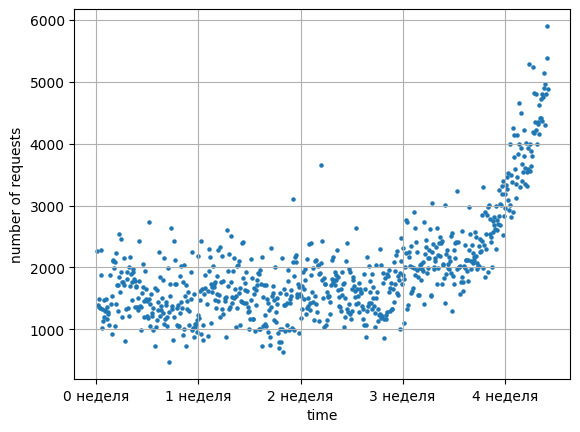

In [60]:
# Visualization without trend

import matplotlib.pyplot as plt

plt.scatter(hours_data, requests_data, s=5)
plt.xlabel('time')
plt.ylabel('number of requests')
plt.grid()

plt.xticks([w*7*24 for w in range(6)],["%i неделя" %w for w in range(6)])

plt.autoscale(tight=False)

plt.show()

In [61]:
f2p_1, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 1, full=True)
print("Параметры модели (1-степень) {}".format(f2p_1))

f2p_2, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 2, full=True)
print("Параметры модели (2-степень) {}".format(f2p_2))

f2p_3, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 3, full=True)
print("Параметры модели (3-степень) {}".format(f2p_3))

f2p_5, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 5, full=True)
print("Параметры модели (5-степень) {}".format(f2p_5))

f2p_10, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 10, full=True)
print("Параметры модели (10-степень) {}".format(f2p_10))

f2p_20, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 20, full=True)
print("Параметры модели (20-степень) {}".format(f2p_20))

Параметры модели (1-степень) [  2.59619213 989.02487106]
Параметры модели (2-степень) [ 1.05322215e-02 -5.26545650e+00  1.97476082e+03]
Параметры модели (3-степень) [ 3.04960132e-05 -2.35893797e-02  4.94226019e+00  1.33328797e+03]
Параметры модели (5-степень) [ 2.16470951e-10 -3.13405153e-07  1.63844797e-04 -3.41497485e-02
  2.24785575e+00  1.53616050e+03]
Параметры модели (10-степень) [-3.73981969e-22  1.36473757e-18 -2.14294406e-15  1.89884971e-12
 -1.04570108e-09  3.70867731e-07 -8.45604588e-05  1.19167041e-02
 -9.41618607e-01  3.33703840e+01  1.26421204e+03]
Параметры модели (20-степень) [ 4.83047337e-47 -3.18230187e-43  8.87158970e-40 -1.31476985e-36
  9.87734707e-34 -8.55266201e-32 -5.09650285e-28  3.80320736e-25
  4.98590038e-23 -2.74818642e-19  2.35466735e-16 -1.17295737e-13
  3.93125509e-11 -9.23440474e-09  1.52940654e-06 -1.76096815e-04
  1.36395985e-02 -6.69559533e-01  1.86541598e+01 -2.35174966e+02
  2.33820955e+03]


In [62]:
import warnings
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

warnings.filterwarnings("ignore", message="'squared' is deprecated")

# 1 polinomial degree
fx_1 = np.poly1d(f2p_1)
r2_array_1 = []
r2_array_1.append(r2_score(requests_data,  fx_1(hours_data)))
rmse_1 = mean_squared_error(requests_data, fx_1(hours_data), squared=False)
mse_1 = mean_squared_error(requests_data,  fx_1(hours_data), squared=True)
mae_1 = mean_absolute_error(requests_data,  fx_1(hours_data))
print(f'Степень полинома 1: r2_array = {r2_array_1}, mse = {mse_1}, rmse = {rmse_1}, mae = {mae_1}')

# 2 polinomial degree
fx_2 = np.poly1d(f2p_2)
r2_array_2 = []
r2_array_2.append(r2_score(requests_data,  fx_2(hours_data)))
rmse_2 = mean_squared_error(requests_data, fx_2(hours_data), squared=False)
mse_2 = mean_squared_error(requests_data,  fx_2(hours_data), squared=True)
mae_2 = mean_absolute_error(requests_data,  fx_2(hours_data))
print(f'Степень полинома 2: r2_array = {r2_array_2}, mse = {mse_2}, rmse = {rmse_2}, mae = {mae_2}')

# 3 polinomial degree
fx_3 = np.poly1d(f2p_3)
r2_array_3 = []
r2_array_3.append(r2_score(requests_data,  fx_3(hours_data)))
rmse_3 = mean_squared_error(requests_data, fx_3(hours_data), squared=False)
mse_3 = mean_squared_error(requests_data,  fx_3(hours_data), squared=True)
mae_3 = mean_absolute_error(requests_data,  fx_3(hours_data))
print(f'Степень полинома 3: r2_array = {r2_array_3}, mse = {mse_3}, rmse = {rmse_3}, mae = {mae_3}')

# 5 polinomial degree
fx_5 = np.poly1d(f2p_5)
r2_array_5 = []
r2_array_5.append(r2_score(requests_data,  fx_5(hours_data)))
rmse_5 = mean_squared_error(requests_data, fx_5(hours_data), squared=False)
mse_5 = mean_squared_error(requests_data,  fx_5(hours_data), squared=True)
mae_5 = mean_absolute_error(requests_data,  fx_5(hours_data))
print(f'Степень полинома 5: r2_array = {r2_array_5}, mse = {mse_5}, rmse = {rmse_5}, mae = {mae_5}')

# 10 polinomial degree
fx_10 = np.poly1d(f2p_10)
r2_array_10 = []
r2_array_10.append(r2_score(requests_data,  fx_10(hours_data)))
rmse_10 = mean_squared_error(requests_data, fx_10(hours_data), squared=False)
mse_10 = mean_squared_error(requests_data,  fx_10(hours_data), squared=True)
mae_10 = mean_absolute_error(requests_data,  fx_10(hours_data))
print(f'Степень полинома 10: r2_array = {r2_array_10}, mse = {mse_10}, rmse = {rmse_10}, mae = {mae_10}')

# 20 polinomial degree
fx_20 = np.poly1d(f2p_20)
r2_array_20 = []
r2_array_20.append(r2_score(requests_data,  fx_20(hours_data)))
rmse_20 = mean_squared_error(requests_data, fx_20(hours_data), squared=False)
mse_20 = mean_squared_error(requests_data,  fx_20(hours_data), squared=True)
mae_20 = mean_absolute_error(requests_data,  fx_20(hours_data))
print(f'Степень полинома 20: r2_array = {r2_array_20}, mse = {mse_20}, rmse = {rmse_20}, mae = {mae_20}')

Степень полинома 1: r2_array = [0.41632369094258914], mse = 431822.81270718103, rmse = 657.1322642415156, mae = 504.88101037565264
Степень полинома 2: r2_array = [0.6690122985058977], mse = 244875.52092269278, rmse = 494.84898799804853, mae = 389.2663189980563
Степень полинома 3: r2_array = [0.7437366099834488], mse = 189592.0326962248, rmse = 435.4216722858714, mae = 344.1036970490545
Степень полинома 5: r2_array = [0.7711107518847922], mse = 169339.74770906614, rmse = 411.5091101167338, mae = 325.13909896864163
Степень полинома 10: r2_array = [0.7757493961876543], mse = 165907.92702536422, rmse = 407.3179679628241, mae = 319.0408273417002
Степень полинома 20: r2_array = [0.7967407043361026], mse = 150377.87109127195, rmse = 387.78585726051426, mae = 300.73478823407595


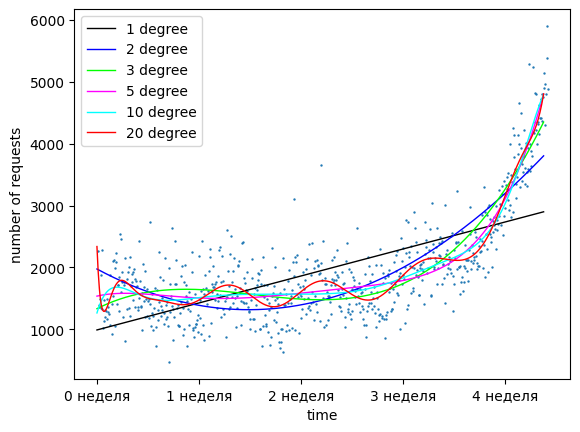

In [63]:
# Visualization with different polynomial degree

import matplotlib.pyplot as plt

plt.scatter(hours_data, requests_data, s=0.5)
plt.xlabel('time')
plt.ylabel('number of requests')
plt.xticks([w*7*24 for w in range(6)],["%i неделя" %w for w in range(6)])

f2x = np.linspace(0, hours_data[len(hours_data)], len(hours_data))

# viz. polynomial degree 1
f2y_1 = fx_1(f2x)
plt.plot(f2x, f2y_1, linewidth=1.0, color='black', label = '1 degree')

# viz. polynomial degree 2
f2y_2 = fx_2(f2x)
plt.plot(f2x, f2y_2, linewidth=1.0, color='blue', label = '2 degree')

# viz. polynomial degree 3
f2y_3 = fx_3(f2x)
plt.plot(f2x, f2y_3, linewidth=1.0, color='lime', label = '3 degree')

# viz. polynomial degree 5
f2y_5 = fx_5(f2x)
plt.plot(f2x, f2y_5, linewidth=1.0, color='magenta', label = '5 degree')

# viz. polynomial degree 10
f2y_10 = fx_10(f2x)
plt.plot(f2x, f2y_10, linewidth=1.0, color='cyan', label = '10 degree')

# viz. polynomial degree 20
f2y_20 = fx_20(f2x)
plt.plot(f2x, f2y_20, linewidth=1.0, color='red', label = '20 degree')


plt.autoscale(tight=False)
plt.legend()
plt.show()

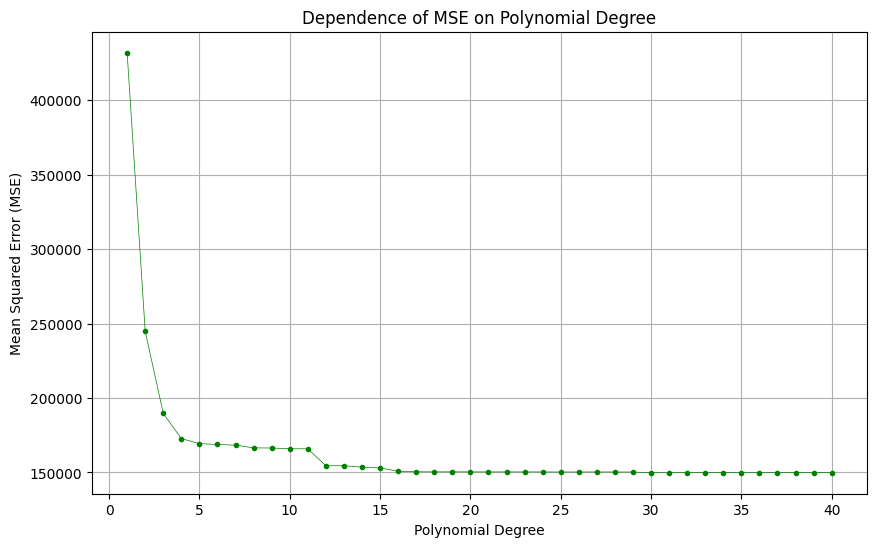

In [64]:
# Dependence of mse on polynomial degree

pol_list = []
mse_list = []

for i in range(1, 41):
    pol_list.append(i)
    f2p_i, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, i, full=True)
    fx_i = np.poly1d(f2p_i)
    mse_i = mean_squared_error(requests_data,  fx_i(hours_data), squared=True)
    mse_list.append(mse_i)

plt.figure(figsize=(10, 6))
plt.plot(pol_list, mse_list, marker='.', color='green', linewidth=0.5)
plt.title('Dependence of MSE on Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

In [78]:
# Function for finding the mean square error

import time

def MSE(y_true, y_pred):
    true_val = []
    pred_val = []
    pred_val_raw = y_pred

    for el in y_true:
        true_val.append(el)
    for el in pred_val_raw:
        pred_val.append(el)
    n = len(true_val)
    sum = 0
    for i in range(n):
        sum += (true_val[i] - pred_val[i])**2
    return (sum / n)

# time for 20 polinomial degree solving by my func
start_time = time.time()

MSE_my_func = MSE(requests_data, fx_20(hours_data))
print(f'MSE by my func: {MSE_my_func}')

end_time = time.time()
delta_time = end_time - start_time
print(f"Time taken for my function: {delta_time} seconds")


# time for 20 polinomial degree solving by lib func
start_time = time.time()

MSE_lib_func = mean_squared_error(requests_data,  fx_20(hours_data), squared=True)
print(f'MSE by lib func: {MSE_lib_func}')

end_time = time.time()
delta_time = end_time - start_time
print(f"Time taken for lib function: {delta_time} seconds")


MSE by my func: 150377.8710912718
Time taken for my function: 0.0017788410186767578 seconds
MSE by lib func: 150377.87109127195
Time taken for lib function: 0.000782012939453125 seconds
